In [1]:
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import requests
import matplotlib.pyplot as plt

url = "https://recoglass.net/api/get.php?key=SPXEGN1TGSB2IKT9&ip=&merge=10min&ls=0&le=5000&ext=json"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df_api = pd.DataFrame(data)
    
    print(df_api.head())
else:
    print("Failed to retrieve data")
'''

'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.model_selection import train_test_split\nimport requests\nimport matplotlib.pyplot as plt\n\nurl = "https://recoglass.net/api/get.php?key=SPXEGN1TGSB2IKT9&ip=&merge=10min&ls=0&le=5000&ext=json"\n\nresponse = requests.get(url)\n\nif response.status_code == 200:\n    data = response.json()\n    df_api = pd.DataFrame(data)\n    \n    print(df_api.head())\nelse:\n    print("Failed to retrieve data")\n'

In [2]:
'''
df_api['datetime'] = pd.to_datetime(df_api['datetime'])

plt.figure(figsize=(12, 6))
plt.plot(df_api['datetime'], df_api['CO2'], label='CO2 Levels', color='blue')
plt.xlabel('Datetime')
plt.ylabel('CO₂ (ppm)')
plt.title('CO₂ Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()
'''


"\ndf_api['datetime'] = pd.to_datetime(df_api['datetime'])\n\nplt.figure(figsize=(12, 6))\nplt.plot(df_api['datetime'], df_api['CO2'], label='CO2 Levels', color='blue')\nplt.xlabel('Datetime')\nplt.ylabel('CO₂ (ppm)')\nplt.title('CO₂ Levels Over Time')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [3]:
'''print(f"Total rows in DataFrame: {df_api.shape[0]}")'''

'print(f"Total rows in DataFrame: {df_api.shape[0]}")'

In [4]:
'''
df_api['datetime'] = pd.to_datetime(df_api['datetime'])
df_api = df_api.sort_values('datetime')

df_api.fillna(method='ffill', inplace=True)

df_api.to_csv('multivariate_co2_data.csv', index=False)
'''

"\ndf_api['datetime'] = pd.to_datetime(df_api['datetime'])\ndf_api = df_api.sort_values('datetime')\n\ndf_api.fillna(method='ffill', inplace=True)\n\ndf_api.to_csv('multivariate_co2_data.csv', index=False)\n"

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import requests
import matplotlib.pyplot as plt

df = pd.read_csv('real_time_co2_data.csv')

df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

features = ['Temperature', 'Pressure', 'Humidity', 'VoC', 'Altitude']
target = ['CO2']

scaler = MinMaxScaler()
df[features + target] = scaler.fit_transform(df[features + target])

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len, :-1])  # Features
        y.append(data[i + seq_len, -1])     # Target (CO2)
    return np.array(X), np.array(y)

sequence_length = 96
data = df[features + target].values
X, y = create_sequences(data, sequence_length)

# For verifying that the target variable is indeed the CO2 variable
seq_index = 0  
print("Features (X):", X[seq_index])
print("Target (y):", y[seq_index])

print("Original CO2 target:", df['CO2'].values[sequence_length + seq_index])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Features (X): [[0.4015852  0.64219474 0.1928934  0.62022    0.3574286 ]
 [0.39233818 0.64296754 0.19695431 0.64380327 0.35659131]
 [0.37384412 0.64219474 0.20203046 0.64944713 0.35659131]
 [0.35667107 0.64219474 0.20304569 0.66951739 0.3574286 ]
 [0.33949802 0.64528594 0.2071066  0.68714006 0.35352126]
 [0.32100396 0.64451314 0.2071066  0.69310067 0.3551028 ]
 [0.2998679  0.64374034 0.21116751 0.71731744 0.35584706]
 [0.27873184 0.63987635 0.21725888 0.7265895  0.35891711]
 [0.25627477 0.63446677 0.2213198  0.734393   0.3635687 ]
 [0.22985469 0.63910355 0.22639594 0.75339783 0.35966136]
 [0.20211361 0.63678516 0.23147208 0.78104123 0.36282445]
 [0.1677675  0.63292117 0.24365482 0.78602281 0.36663876]
 [0.12153236 0.63446677 0.26700508 0.80448053 0.36431296]
 [0.07265522 0.6251932  0.25279188 0.83028104 0.37361615]
 [0.02642008 0.61205564 0.24162437 0.81643055 0.38822216]
 [0.         0.60664606 0.31675127 0.8233414  0.3921295 ]
 [0.00528402 0.60587326 0.40101523 0.86224372 0.39361801]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LayerNormalization
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.activations import swish

lr_schedule_cos_lstm = CosineDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    alpha=0.0
)

lr_scheduler_lstm = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=10, 
    min_lr=1e-6, 
    verbose=1
)

lr_schedule_expo_lstm = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,  
    decay_rate=0.9,  
    staircase=True  
)

optimizer_adam_lstm = Adam(learning_rate=lr_schedule_expo_lstm)

optimizer_adamw = AdamW(learning_rate=0.001, weight_decay=1e-5) 

model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    LayerNormalization(),
    Dropout(0.2),
    Dense(32, activation='softplus'),
    Dense(1)  
])

model.compile(optimizer=optimizer_adam_lstm , loss=tf.keras.losses.Huber(), metrics=['mae'])

history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1)


C:\Users\spiel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.2545 - mae: 0.5292 - val_loss: 0.0518 - val_mae: 0.3138
Epoch 2/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0126 - mae: 0.1236 - val_loss: 0.0158 - val_mae: 0.1656
Epoch 3/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0084 - mae: 0.1010 - val_loss: 0.0187 - val_mae: 0.1855
Epoch 4/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0051 - mae: 0.0773 - val_loss: 0.0056 - val_mae: 0.1004
Epoch 5/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0049 - mae: 0.0773 - val_loss: 0.0036 - val_mae: 0.0815
Epoch 6/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0030 - mae: 0.0609 - val_loss: 0.0034 - val_mae: 0.0782
Epoch 7/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0030 - mae: 0.0611 - val_loss: 0.0031 - val_mae: 0.0748
Epoch 8/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0026 - mae: 0.0562 - val_loss: 5.2515e-04 - val_mae: 0.0255
Epoch 9/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7304e-04 - mae: 0.0157
Test Loss: 0.0001951744343386963
Test MAE: 0.016577156260609627


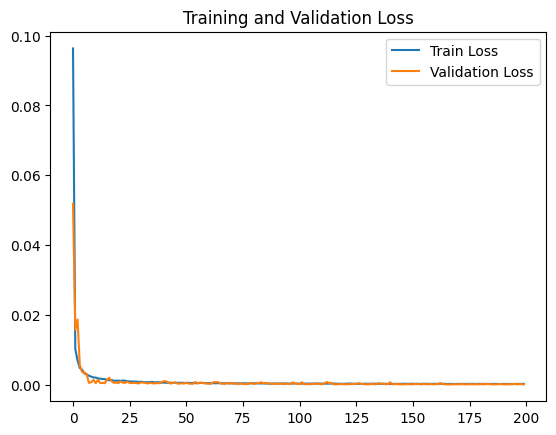

In [7]:
import matplotlib.pyplot as plt
import json

loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


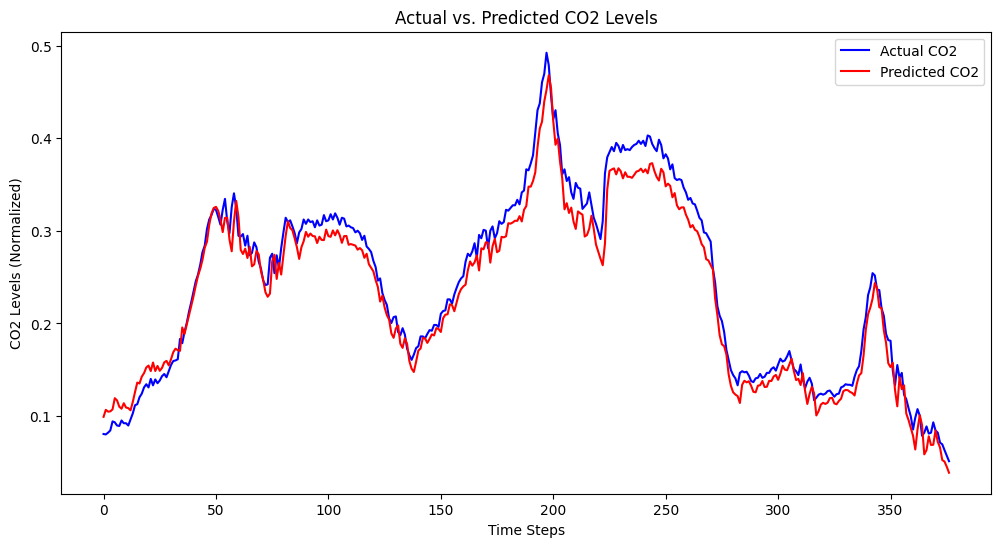

In [8]:
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual CO2', color='blue')
plt.plot(y_pred, label='Predicted CO2', color='red')
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels (Normalized)')
plt.title('Actual vs. Predicted CO2 Levels')
plt.legend()
plt.show()

results = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred.flatten()
})
# results.to_csv('predictions_vs_actual_lstm.csv', index=False)
# model.save('model_lstm.h5')
model.save('best_model_lstm.keras')

In [9]:
from tensorflow.keras.layers import GRU

lr_scheduler_gru = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=10, 
    min_lr=1e-6, 
    verbose=1
)

lr_schedule_expo_gru = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,  
    decay_rate=0.9,  
    staircase=True  
)

lr_schedule_cos_gru = CosineDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    alpha=0.0
)

optimizer_adam_gru = Adam(learning_rate=lr_schedule_expo_gru)

optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5) 

model_gru = Sequential([
    GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    LayerNormalization(),
    Dropout(0.3),
    Dense(64),
    LeakyReLU(alpha=0.01),
    Dense(1)  
])

model_gru.compile(optimizer=optimizer_adam_gru, loss=tf.keras.losses.Huber(), metrics=['mae'])
history_gru = model_gru.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1)


Epoch 1/200


C:\Users\spiel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3887 - mae: 0.6943 - val_loss: 0.0047 - val_mae: 0.0838
Epoch 2/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0213 - mae: 0.1637 - val_loss: 0.0010 - val_mae: 0.0380
Epoch 3/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0124 - mae: 0.1239 - val_loss: 0.0036 - val_mae: 0.0790
Epoch 4/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0082 - mae: 0.1007 - val_loss: 9.2377e-04 - val_mae: 0.0382
Epoch 5/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0056 - mae: 0.0845 - val_loss: 0.0080 - val_mae: 0.1239
Epoch 6/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0045 - mae: 0.0741 - val_loss: 0.0049 - val_mae: 0.0964
Epoch 7/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0030 - mae: 0.0613 - val_loss: 0.0031 - val_mae: 0.0767
Epoch 8/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0026 - mae: 0.0554 - val_loss: 0.0040 - val_mae: 0.0843
Epoch 9/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.00

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.1167e-05 - mae: 0.0090
Test Loss: 7.858849130570889e-05
Test MAE: 0.009696483612060547


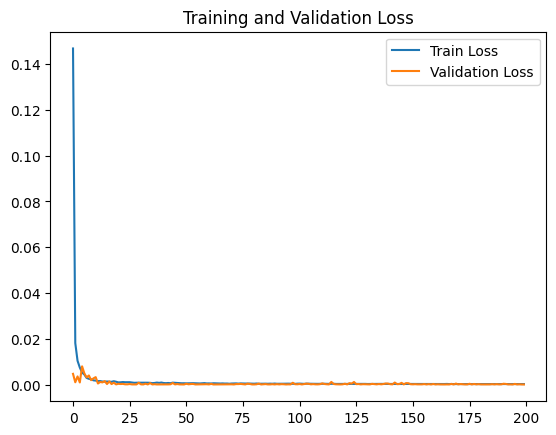

In [10]:
loss, mae = model_gru.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


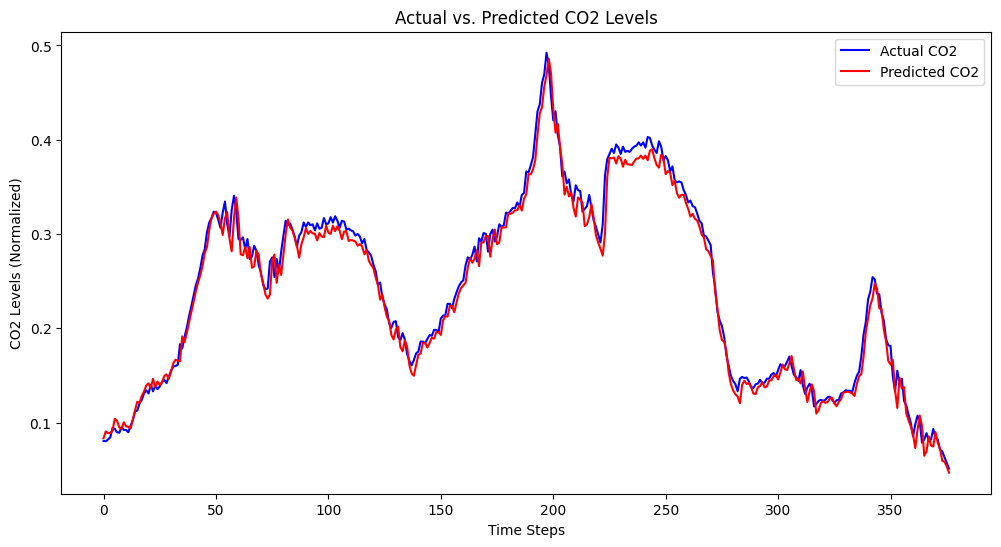

In [11]:
y_pred_gru = model_gru.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual CO2', color='blue')
plt.plot(y_pred_gru, label='Predicted CO2', color='red')
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels (Normalized)')
plt.title('Actual vs. Predicted CO2 Levels')
plt.legend()
plt.show()

results = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred_gru.flatten()
})
# results.to_csv('predictions_vs_actual_gru.csv', index=False)
model_gru.save('best_model_gru.keras')

In [12]:
from tensorflow.keras.layers import Bidirectional

lr_scheduler_bi = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=10, 
    min_lr=1e-6, 
    verbose=1
)

lr_schedule_expo_bi = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,  
    decay_rate=0.9,  
    staircase=True  
)

lr_schedule_cos_bi = CosineDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    alpha=0.0
)

optimizer_adam_bi = Adam(learning_rate=lr_schedule_expo_bi)

optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5) 
                  
model_bi_lstm = Sequential([
    Bidirectional(LSTM(128, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])),
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation=swish),
    Dense(1)
])

model_bi_lstm.compile(optimizer=optimizer_adam_bi, loss=tf.keras.losses.Huber(), metrics=['mae'])
history_bi_lstm = model_bi_lstm.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1)


Epoch 1/200


C:\Users\spiel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.2437 - mae: 0.5302 - val_loss: 8.7016e-04 - val_mae: 0.0295
Epoch 2/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0182 - mae: 0.1467 - val_loss: 0.0237 - val_mae: 0.2143
Epoch 3/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0101 - mae: 0.1100 - val_loss: 0.0043 - val_mae: 0.0883
Epoch 4/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0076 - mae: 0.0953 - val_loss: 0.0042 - val_mae: 0.0874
Epoch 5/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0051 - mae: 0.0791 - val_loss: 0.0093 - val_mae: 0.1326
Epoch 6/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0040 - mae: 0.0704 - val_loss: 0.0205 - val_mae: 0.1992
Epoch 7/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0040 - mae: 0.0703 - val_loss: 0.0074 - val_mae: 0.1180
Epoch 8/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0030 - mae: 0.0607 - val_loss: 0.0065 - val_mae: 0.1101
Epoch 9/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.00

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.4056e-05 - mae: 0.0112
Test Loss: 0.00011534275108715519
Test MAE: 0.01252557709813118


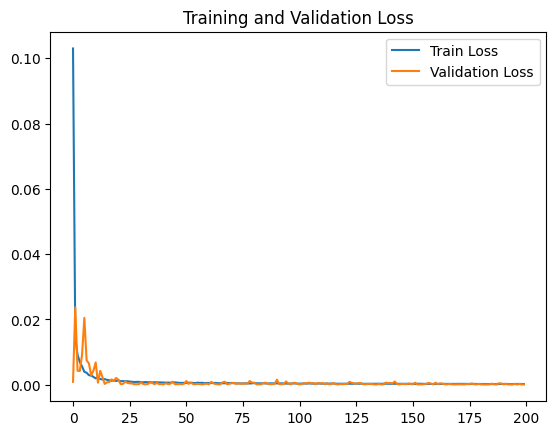

In [13]:
loss, mae = model_bi_lstm.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

plt.plot(history_bi_lstm.history['loss'], label='Train Loss')
plt.plot(history_bi_lstm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


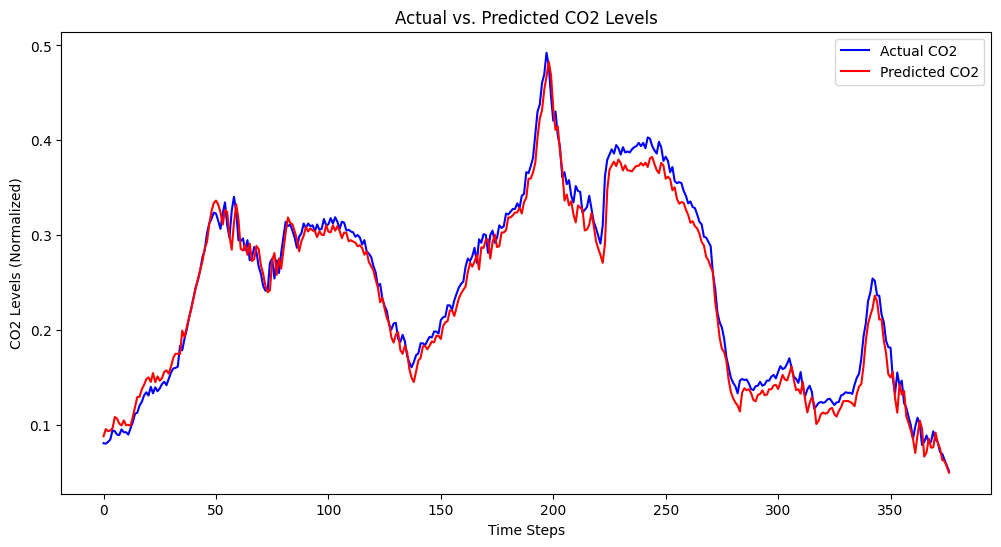

In [14]:
y_pred_bi = model_bi_lstm.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual CO2', color='blue')
plt.plot(y_pred_bi, label='Predicted CO2', color='red')
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels (Normalized)')
plt.title('Actual vs. Predicted CO2 Levels')
plt.legend()
plt.show()

results = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred_bi.flatten()
})
# results.to_csv('predictions_vs_actual_bi.csv', index=False)
model_bi_lstm.save('best_model_bi.keras')

In [15]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

lr_scheduler_cnn = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=10, 
    min_lr=1e-6, 
    verbose=1
)

lr_schedule_expo_cnn = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,  
    decay_rate=0.9,  
    staircase=True  
)

lr_schedule_cos_cnn = CosineDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    alpha=0.0
)

optimizer_adam_cnn = Adam(learning_rate=lr_schedule_expo_cnn)

optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5) 

model_cnn_lstm = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    LSTM(128, return_sequences=False),
    LayerNormalization(),
    Dropout(0.3),
    Dense(64, activation='softplus'),
    Dense(1)
])

model_cnn_lstm.compile(optimizer=optimizer_adam_cnn, loss=tf.keras.losses.Huber(), metrics=['mae'])
history_cnn_lstm = model_cnn_lstm.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1)


Epoch 1/200


C:\Users\spiel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3471 - mae: 0.6303 - val_loss: 0.0097 - val_mae: 0.1294
Epoch 2/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0152 - mae: 0.1356 - val_loss: 0.0014 - val_mae: 0.0459
Epoch 3/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0091 - mae: 0.1053 - val_loss: 0.0074 - val_mae: 0.1122
Epoch 4/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0074 - mae: 0.0954 - val_loss: 0.0029 - val_mae: 0.0692
Epoch 5/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0062 - mae: 0.0884 - val_loss: 0.0045 - val_mae: 0.0858
Epoch 6/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0048 - mae: 0.0752 - val_loss: 0.0030 - val_mae: 0.0692
Epoch 7/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0040 - mae: 0.0693 - val_loss: 0.0015 - val_mae: 0.0481
Epoch 8/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0034 - mae: 0.0635 - val_loss: 0.0029 - val_mae: 0.0681
Epoch 9/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0033 -

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.9823e-04 - mae: 0.0232
Test Loss: 0.00027956924168393016
Test MAE: 0.015131523832678795


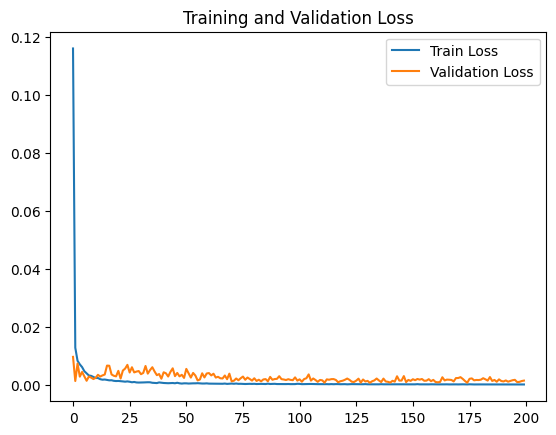

In [16]:
loss, mae = model_cnn_lstm.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

plt.plot(history_cnn_lstm.history['loss'], label='Train Loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


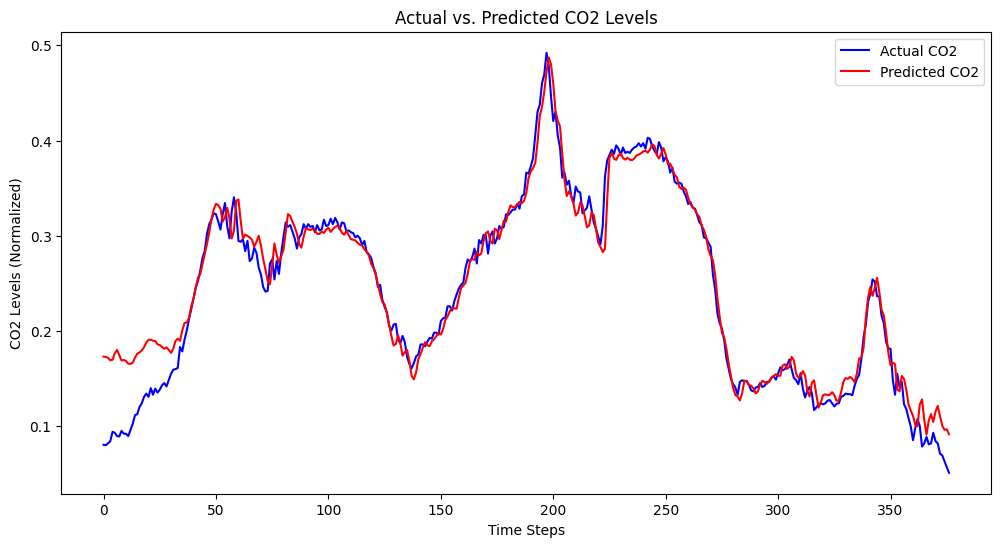

In [17]:
y_pred_cnn = model_cnn_lstm.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual CO2', color='blue')
plt.plot(y_pred_cnn, label='Predicted CO2', color='red')
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels (Normalized)')
plt.title('Actual vs. Predicted CO2 Levels')
plt.legend()
plt.show()

results = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred_cnn.flatten()
})
# results.to_csv('predictions_vs_actual_cnn.csv', index=False)
model_cnn_lstm.save('best_model_cnn.keras')

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred_rf = rf.predict(X_test.reshape(X_test.shape[0], -1))

mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")


Random Forest MAE: 0.00996168970980931


In [19]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred_xgb = xgb.predict(X_test.reshape(X_test.shape[0], -1))

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")


XGBoost MAE: 0.01270796246993461


In [20]:
optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5) 

lr_scheduler_deep = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=10, 
    min_lr=1e-6, 
    verbose=1
)

lr_schedule_expo_deep = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,  
    decay_rate=0.9,  
    staircase=True  
)

lr_schedule_cos_deep = CosineDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    alpha=0.0
)

optimizer_adam_deep = Adam(learning_rate=lr_schedule_expo_deep)


model_deep = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),  
    Dropout(0.2), 
    LSTM(64, return_sequences=True),  
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    LayerNormalization(),  
    Dropout(0.2),
    Dense(32),
    LeakyReLU(alpha=0.01), 
    Dense(1)  
])

model_deep.compile(optimizer=optimizer_adam_deep, loss=tf.keras.losses.Huber(), metrics=['mae'])

history_deep = model_deep.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1)


Epoch 1/200


C:\Users\spiel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\spiel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - loss: 0.1433 - mae: 0.3618 - val_loss: 0.0074 - val_mae: 0.1115
Epoch 2/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0129 - mae: 0.1255 - val_loss: 0.0012 - val_mae: 0.0395
Epoch 3/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0084 - mae: 0.1013 - val_loss: 9.9380e-04 - val_mae: 0.0298
Epoch 4/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0067 - mae: 0.0911 - val_loss: 0.0015 - val_mae: 0.0451
Epoch 5/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0061 - mae: 0.0859 - val_loss: 0.0011 - val_mae: 0.0394
Epoch 6/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0053 - mae: 0.0767 - val_loss: 0.0011 - val_mae: 0.0378
Epoch 7/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0041 - mae: 0.0678 - val_loss: 0.0012 - val_mae: 0.0371
Epoch 8/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0039 - mae: 0.0671 - val_loss: 0.0011 - val_mae: 0.0354
Epoch 9/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0012 - mae: 0.0441
Test Loss: 0.0013907665852457285
Test MAE: 0.048745542764663696


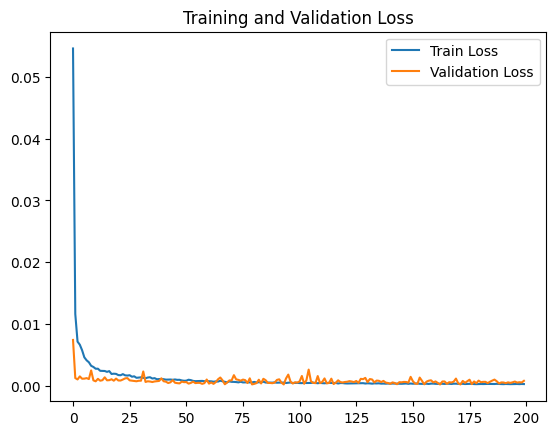

In [21]:
loss, mae = model_deep.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

plt.plot(history_deep.history['loss'], label='Train Loss')
plt.plot(history_deep.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


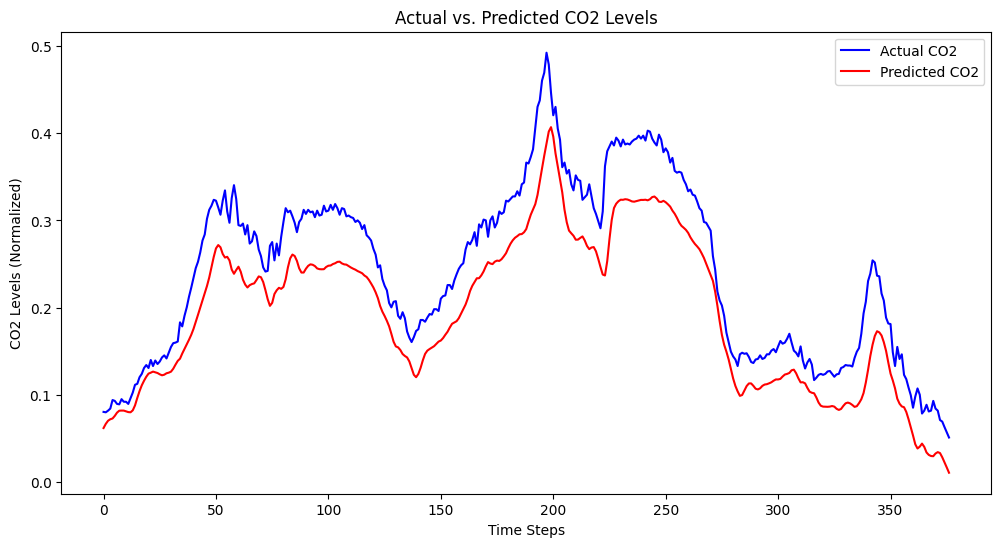

In [22]:
y_pred_deep = model_deep.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual CO2', color='blue')
plt.plot(y_pred_deep, label='Predicted CO2', color='red')
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels (Normalized)')
plt.title('Actual vs. Predicted CO2 Levels')
plt.legend()
plt.show()

results = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred_deep.flatten()
})
# results.to_csv('predictions_vs_actual_deep.csv', index=False)
model_deep.save('best_model_deep.keras')

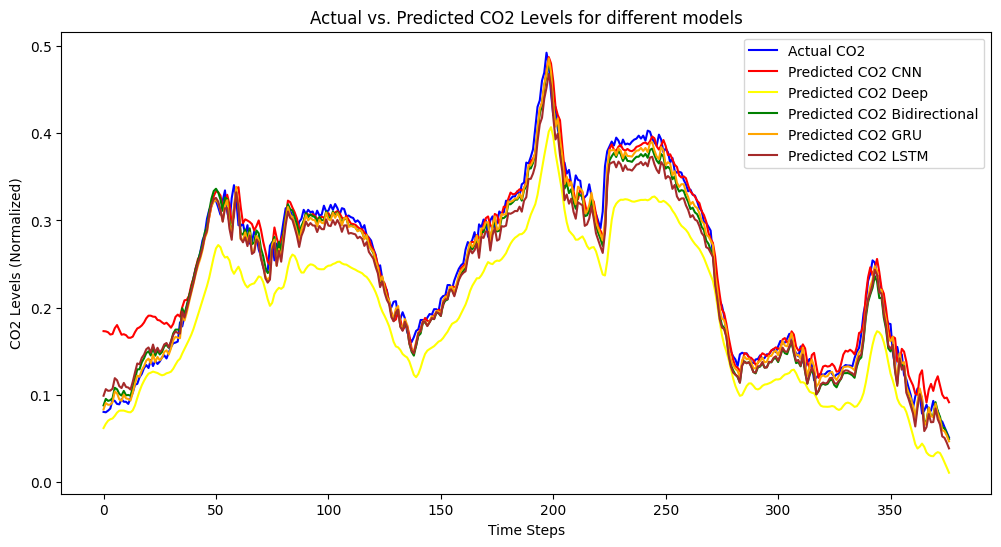

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual CO2', color='blue')
plt.plot(y_pred_cnn, label='Predicted CO2 CNN', color='red')
plt.plot(y_pred_deep, label='Predicted CO2 Deep', color='yellow')
plt.plot(y_pred_bi, label='Predicted CO2 Bidirectional', color='green')
plt.plot(y_pred_gru, label='Predicted CO2 GRU', color='orange')
plt.plot(y_pred, label='Predicted CO2 LSTM', color='brown')
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels (Normalized)')
plt.title('Actual vs. Predicted CO2 Levels for different models')
plt.legend()
plt.show()